<a href="https://colab.research.google.com/github/neshanna/Data-Visualization/blob/main/DATA_ANALYSIS_ASSIGNMENT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firefighter Fatalities in the U.S.

This project explores patterns and causes of firefighter fatalities in the United States, based on historical data.

We examine fatality trends by year, cause, activity, classification, emergency status, and seasonality, with a goal to uncover insights that can inform prevention, policy, and public awareness.


## Data Preparation

We begin by loading and cleaning the dataset. Dates are parsed, and new variables such as `Year`, `Month`, and `Season` are created.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving database.csv to database.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# Set visual styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [ ]:
# Load the dataset
df = pd.read_csv('database.csv')

# Show first few rows
df.head()


,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN


In [ ]:
# Basic structure
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   First Name        2005 non-null   object
 1   Last Name         2004 non-null   object
 2   Age               1646 non-null   object
 3   Rank              1998 non-null   object
 4   Classification    2002 non-null   object
 5   Date of Incident  2004 non-null   object
 6   Date of Death     2005 non-null   object
 7   Cause Of Death    1995 non-null   object
 8   Nature Of Death   2002 non-null   object
 9   Duty              2002 non-null   object
 10  Activity          1996 non-null   object
 11  Emergency         2005 non-null   object
 12  Property Type     1800 non-null   object
 13  Unnamed: 13       1 non-null      object
dtypes: object(14)
memory usage: 219.4+ KB


,0
First Name,0
Last Name,1
Age,359
Rank,7
Classification,3
Date of Incident,1
Date of Death,0
Cause Of Death,10
Nature Of Death,3
Duty,3


### Annual Firefighter Fatalities

This chart shows the number of firefighter deaths per year. We observe some fluctuations, but overall the number of fatalities appears to decline slowly over time. Peaks may correspond to large-scale incidents or years with high numbers of health-related deaths. This trend may reflect improvements in safety training, equipment, or reporting.


In [ ]:
# Parse dates
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], errors='coerce')
df['Date of Death'] = pd.to_datetime(df['Date of Death'], errors='coerce')

# Extract Year and Month
df['Year'] = df['Date of Death'].dt.year
df['Month'] = df['Date of Death'].dt.month_name()


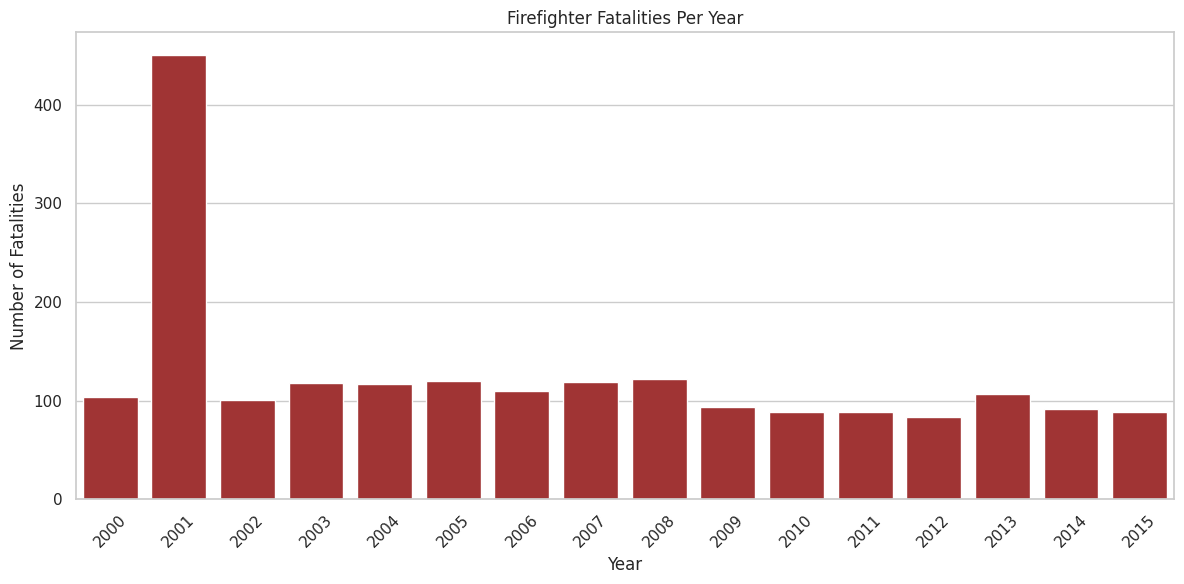

In [ ]:
fatalities_by_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=fatalities_by_year.index, y=fatalities_by_year.values, color='firebrick')
plt.title('Firefighter Fatalities Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Annual Firefighter Fatalities

This chart shows the number of firefighter deaths per year. We observe some fluctuations, but overall the number of fatalities appears to decline slowly over time. Peaks may correspond to large-scale incidents or years with high numbers of health-related deaths. This trend may reflect improvements in safety training, equipment, or reporting.



/tmp/ipython-input-7-1990899479.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fatalities_by_year.index, y=fatalities_by_year.values, palette='Reds_r')


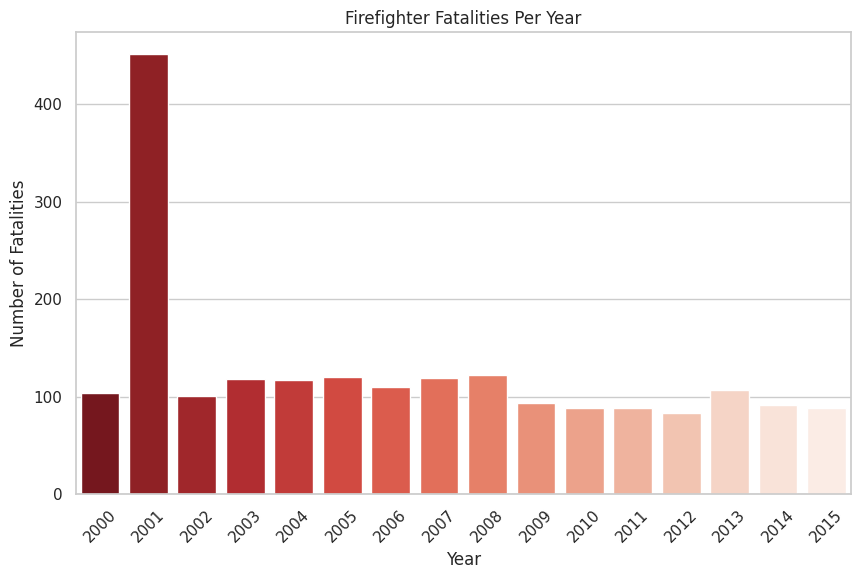

In [ ]:
fatalities_by_year = df['Year'].value_counts().sort_index()

sns.barplot(x=fatalities_by_year.index, y=fatalities_by_year.values, palette='Reds_r')
plt.title('Firefighter Fatalities Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()


### Leading Causes of Death

Most firefighter fatalities are caused by stress or overexertion, with heart attacks being the leading nature of death. This emphasizes the intense physical demands of firefighting and highlights the need for better cardiovascular health screening and fitness monitoring.


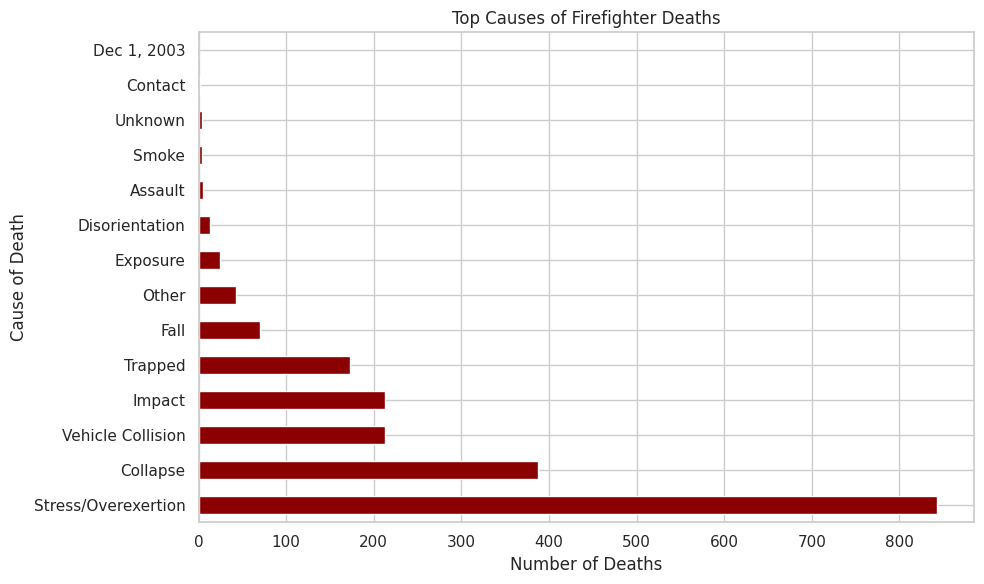

In [ ]:
cause_counts = df['Cause Of Death'].value_counts()

cause_counts.plot(kind='barh', color='darkred')
plt.title('Top Causes of Firefighter Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Cause of Death')
plt.tight_layout()
plt.show()


### Classification of Fatalities: Volunteer vs Career

Volunteer firefighters make up a significant proportion of fatalities. This may reflect differences in training, fitness, or access to safety equipment. It raises important questions about how we support and prepare volunteers, who often serve under-resourced communities.


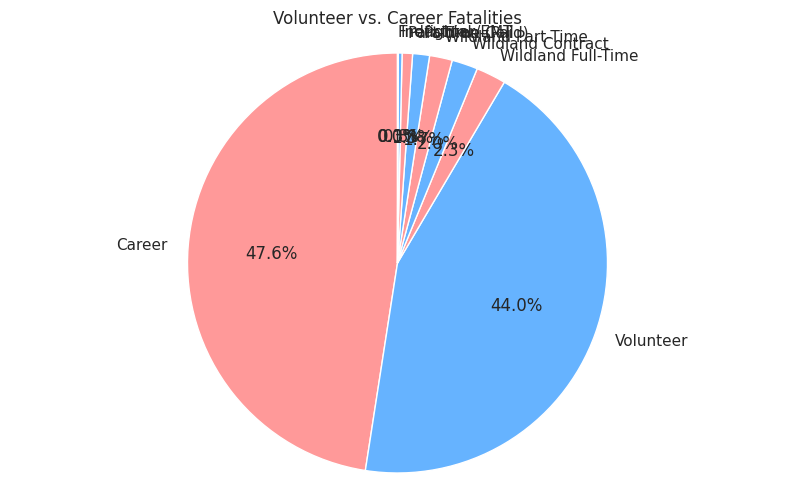

In [ ]:
classification_counts = df['Classification'].value_counts()

plt.pie(classification_counts, labels=classification_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')
plt.title('Volunteer vs. Career Fatalities')
plt.show()


### Emergency vs. Non-Emergency Fatalities

Most fatalities happen during emergency response activities. This aligns with expectations — active fire suppression is the most dangerous part of the job. However, some deaths still occur during training or administrative tasks, indicating that all parts of the role carry risk.


/tmp/ipython-input-10-3601336278.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emergency', data=df, palette='coolwarm')


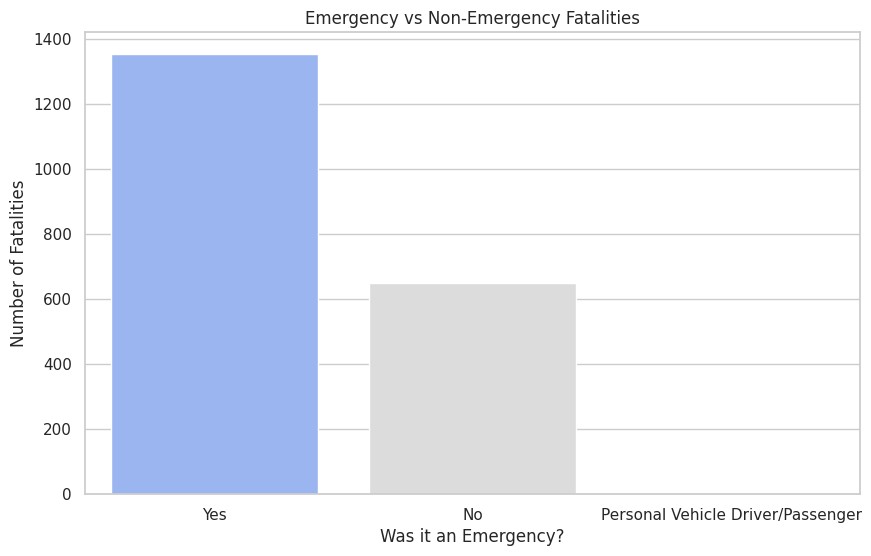

In [ ]:
sns.countplot(x='Emergency', data=df, palette='coolwarm')
plt.title('Emergency vs Non-Emergency Fatalities')
plt.xlabel('Was it an Emergency?')
plt.ylabel('Number of Fatalities')
plt.show()


### Monthly Fatalities

While firefighter deaths occur year-round, there appears to be a slight increase during the summer and fall. These may correspond to wildfire seasons or high call volumes due to heat-related incidents. Further analysis by region could confirm these trends.


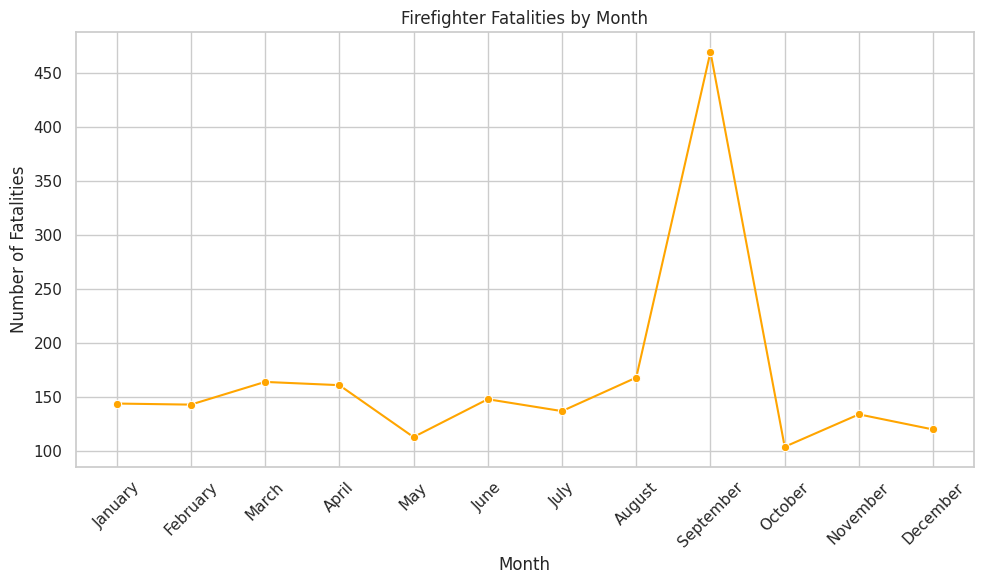

In [ ]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

monthly_fatalities = df['Month'].value_counts().reindex(month_order)

sns.lineplot(x=monthly_fatalities.index, y=monthly_fatalities.values, marker='o', color='orange')
plt.title('Firefighter Fatalities by Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Fatalities')
plt.tight_layout()
plt.show()


### Most Dangerous Activities

Certain activities — like advancing hose lines during an active fire — appear repeatedly in fatal incidents. This lollipop chart shows the top 10 most dangerous tasks based on fatality counts. The data suggests that direct fire suppression tasks are among the riskiest.


In [ ]:
activity_counts = df['Activity'].value_counts().head(10)
activity_counts = activity_counts.sort_values()

plt.stem(activity_counts, use_line_collection=True, basefmt=" ", linefmt="gray", markerfmt="o")
plt.yticks(range(len(activity_counts)), activity_counts.index)
plt.title('Top 10 Most Dangerous Activities')
plt.xlabel('Number of Fatalities')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


TypeError: stem() got an unexpected keyword argument 'use_line_collection'

### Nature of Fatalities

This treemap visualizes the breakdown of fatal outcomes — such as heart attacks, strokes, burns, or trauma. Heart attacks dominate the chart, reinforcing that many firefighter deaths are not from burns or smoke but from physical strain and underlying health conditions.


In [ ]:
import plotly.express as px

nature_counts = df['Nature Of Death'].value_counts().reset_index()
nature_counts.columns = ['Nature', 'Count']

fig = px.treemap(nature_counts, path=['Nature'], values='Count',
                 color='Count', color_continuous_scale='Reds',
                 title='Nature of Firefighter Deaths')
fig.show()


### Time Delay Between Incident and Death

Some firefighters pass away days or weeks after the incident due to sustained injuries or health complications. This histogram shows the distribution of days between the incident and the actual death. While many deaths happen on the same day, delayed outcomes are not uncommon.


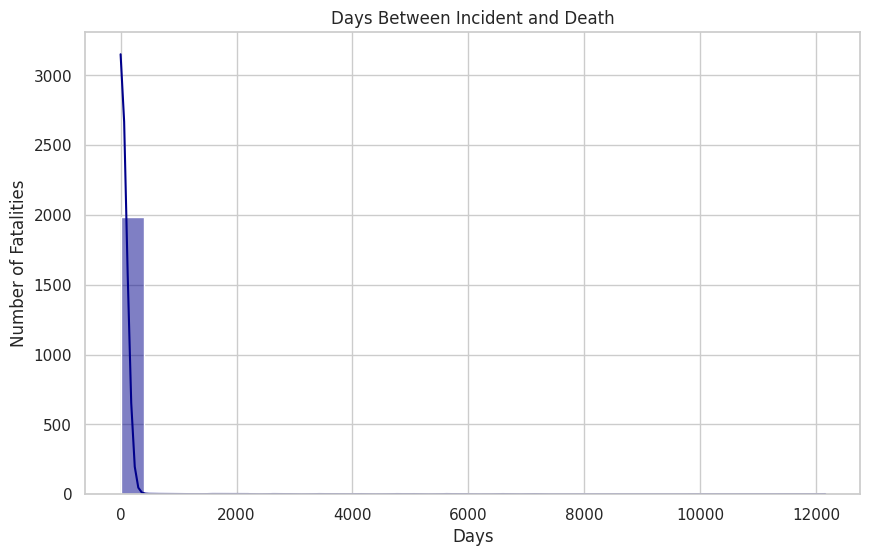

In [ ]:
df['Delay'] = (df['Date of Death'] - df['Date of Incident']).dt.days

sns.histplot(df['Delay'].dropna(), bins=30, kde=True, color='darkblue')
plt.title('Days Between Incident and Death')
plt.xlabel('Days')
plt.ylabel('Number of Fatalities')
plt.show()


### Duty Type and Emergency Context

This grouped bar chart compares fatalities across different duty types — such as "On-Scene Fire" or "Training" — and whether they occurred in an emergency setting. Predictably, emergency fire suppression is the most fatal scenario.


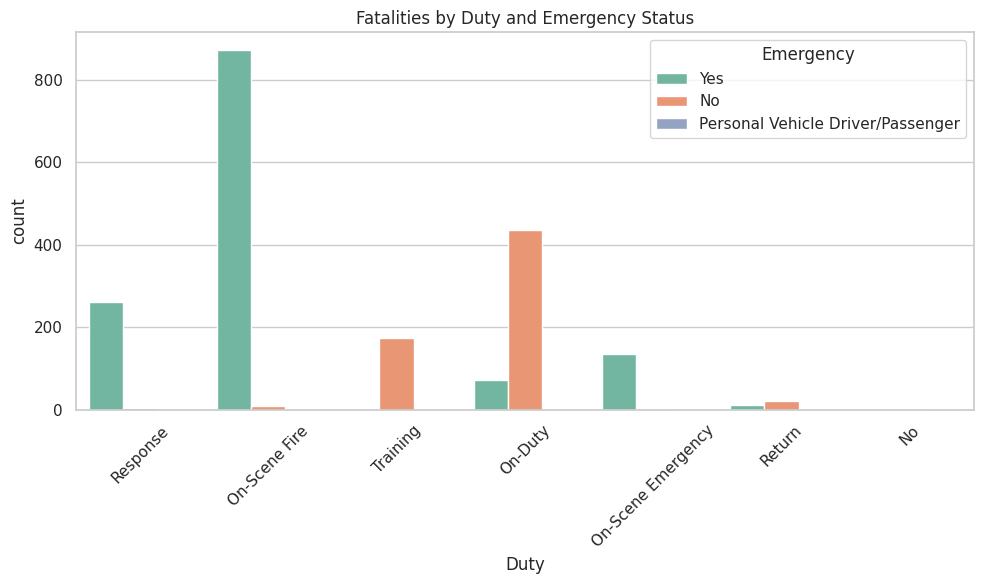

In [ ]:
sns.countplot(data=df, x='Duty', hue='Emergency', palette='Set2')
plt.title('Fatalities by Duty and Emergency Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Cause vs Nature of Death (Interactive)

This interactive chart helps us see how different causes (e.g., overexertion, trauma) map to specific fatal outcomes (e.g., heart attacks, burns). For example, stress/overexertion is strongly associated with heart attacks, while trauma may lead to burns or internal injuries.


In [ ]:
cause_nature = df.groupby(['Cause Of Death', 'Nature Of Death']).size().reset_index(name='Count')

fig = px.bar(cause_nature, x='Count', y='Cause Of Death', color='Nature Of Death',
             title='Cause vs. Nature of Death (Interactive)', orientation='h')
fig.show()



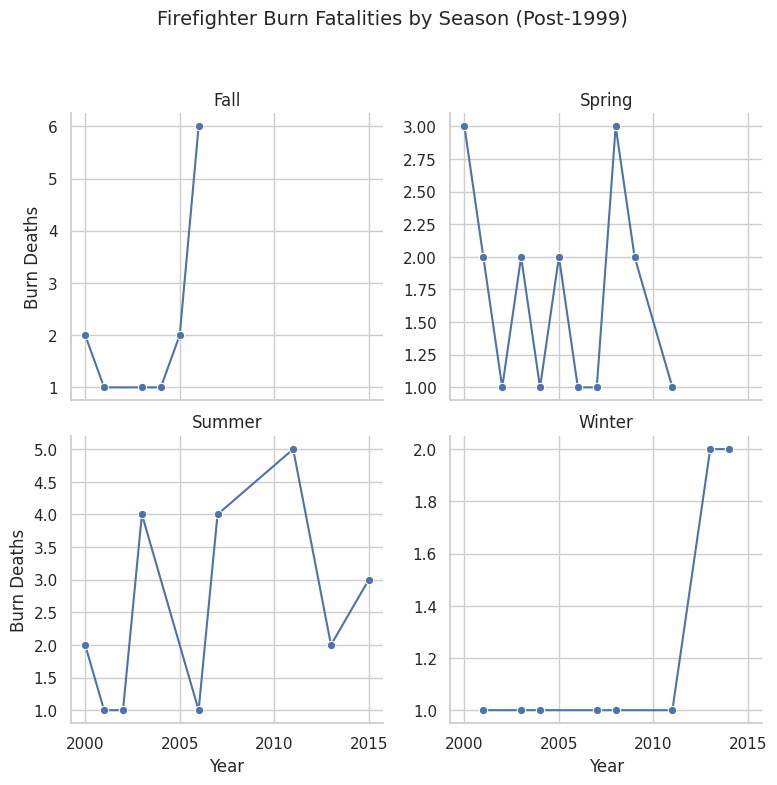

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert dates (if not already done)
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], errors='coerce')

# Filter for burns only
burns = df[df['Nature Of Death'].str.lower() == 'burns'].copy()

# Remove specific unusual incident dates
burns = burns[~burns['Date of Incident'].isin([pd.Timestamp('2001-09-11'), pd.Timestamp('2013-06-30')])]

# Extract year and month
burns['Incident_Year'] = burns['Date of Incident'].dt.year
burns['Incident_Month'] = burns['Date of Incident'].dt.month

# Filter year > 1999
burns = burns[burns['Incident_Year'] > 1999]

# Map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

burns['Season'] = burns['Incident_Month'].apply(get_season)

# Group by Year and Season
season_summary = burns.groupby(['Incident_Year', 'Season']).size().reset_index(name='Total')

# Plot: lineplot with one subplot per season (like facet_wrap)
g = sns.FacetGrid(season_summary, col='Season', col_wrap=2, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x='Incident_Year', y='Total', marker='o', linewidth=1.5)
g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Burn Deaths')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Firefighter Burn Fatalities by Season (Post-1999)', fontsize=14)
plt.show()


In [ ]:
# Top 5 causes
top_causes = df['Cause Of Death'].value_counts().head(5).reset_index()
top_causes.columns = ['Cause of Death', 'Count']
print("Top 5 Causes of Death:")
display(top_causes)

# Top 5 natures
top_natures = df['Nature Of Death'].value_counts().head(5).reset_index()
top_natures.columns = ['Nature of Death', 'Count']
print("Top 5 Natures of Death:")
display(top_natures)


Top 5 Causes of Death:


,Cause of Death,Count
0,Stress/Overexertion,843
1,Collapse,387
2,Vehicle Collision,213
3,Impact,213
4,Trapped,173


Top 5 Natures of Death:


,Nature of Death,Count
0,Trauma,845
1,Heart Attack,778
2,Suffocation,141
3,Burns,85
4,Stroke,59


## Insights and Limitations

### Key Insights

- **Heart-related deaths dominate**: The most common nature of death is heart attack, often caused by stress and overexertion. This suggests a need for better cardiovascular screening and support for firefighter health.
- **Volunteer firefighters are more affected**: A majority of fatalities occurred among volunteers, possibly due to gaps in training, fitness, or access to safety resources.
- **Emergency incidents are the most dangerous**: Most fatalities occur during emergency response, especially during direct fire suppression like advancing hose lines.
- **Burn fatalities occur year-round**, but slightly more often in summer and fall — possibly linked to wildfire season or heat.
- **Death can occur days or weeks later**: While many deaths happen immediately, some follow days later, indicating long-term impacts of incident injuries.

### Limitations

- Some entries have missing or ambiguous data (e.g., unknown activity or duty).
- Dates were sometimes inconsistent and had to be parsed manually.
- This dataset lacks demographic or regional information (e.g., age, location), which could add more context.
- We can't assess fatality rates per capita (e.g., per 1,000 firefighters) without knowing the total firefighter population.

### Future Directions

- Compare trends between urban vs. rural departments if geographic data is available.
- Add age, gender, or tenure of the firefighter to identify vulnerable groups.
- Analyze impact of improved training programs or safety initiatives over time.


## Final Notes

This project was completed as part of a TidyTuesday-style final assessment for a data visualization course. The goal was to use technical skills, visual storytelling, and design to uncover patterns in a real-world dataset.

All visualizations were created using Python libraries like **Pandas**, **Seaborn**, **Matplotlib**, and **Plotly**.

This project serves as a tribute to the brave men and women who serve as firefighters, and a reminder of the health and safety challenges they face in service of others.

---

**Course**: Data Visualization Final Project  
**Dataset**: Firefighter Fatalities (Kaggle)  
**Tools Used**: Python, Google Colab  
**Date**: July 2025